In [1]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from kneed import KneeLocator

%matplotlib inline

In [3]:
df = pd.read_csv('KAG_conversion_data.csv')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


2. Dummy encode any categorical or object values in the data and save the resulting data frame to variable X.

In [4]:
object_values = list(df.select_dtypes(include = ['category', 'object']))

In [5]:
object_values

['age', 'gender']

In [6]:
X = pd.get_dummies(df, columns = object_values)

3. Using a heat map to show the correlation in the data.
a. Drop the first 4 columns in the data frame X.
b. Basing your answer on what can be seen in the heat map, why did we drop these columns?

<AxesSubplot:>

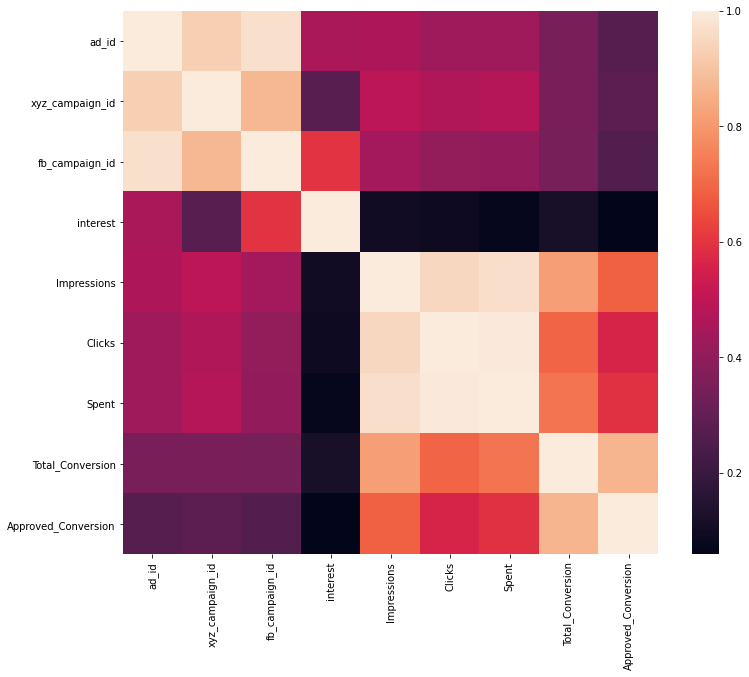

In [7]:
fig = plt.figure(figsize=(12, 10))
sns.heatmap(df.corr())

In [8]:
X.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest', 'Impressions',
       'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion',
       'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49', 'gender_F',
       'gender_M'],
      dtype='object')

In [9]:
X = X[['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion', 
        'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49', 'gender_F', 'gender_M']]
X

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,7350,1,1.430000,2,1,1,0,0,0,0,1
1,17861,2,1.820000,2,0,1,0,0,0,0,1
2,693,0,0.000000,1,0,1,0,0,0,0,1
3,4259,1,1.250000,1,0,1,0,0,0,0,1
4,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,790253,135,198.710001,8,2,0,0,0,1,1,0


Columns were dropped because of their high linear correlation.

4.Using the elbow method:
a. Determine the best number of clusters for the data in the range of 2 to 20.
b. Also include the graphical plot for the elbow curve

Counter({6: 1})


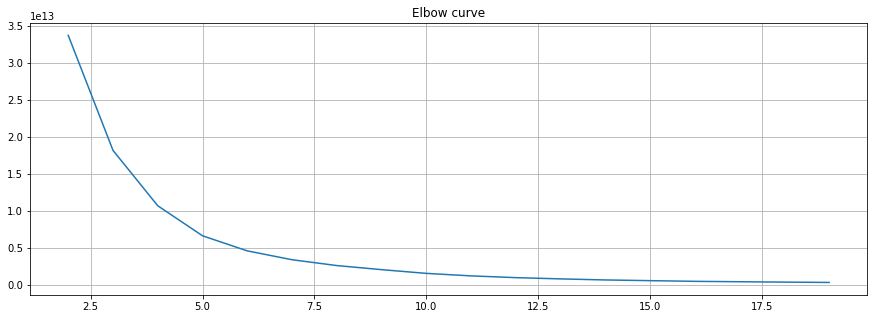

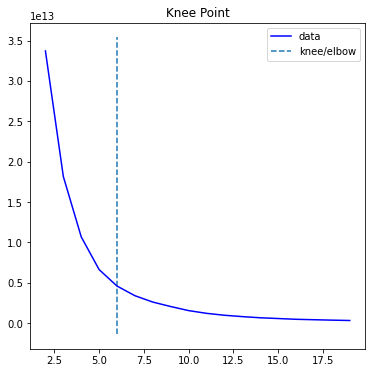

In [10]:
distorsions = []
found_knees = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

kl = KneeLocator(x = range(2, 20), y = distorsions, curve = 'convex', direction = 'decreasing', S = 1)
found_knees.append(kl.knee)

print(Counter(found_knees))
kl.plot_knee()

5. Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.

In [11]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=0)

6. Use the model to predict the labels from the data and save them to variable y_means.

In [14]:
y_means = kmeans.predict(X)

7. Add the values in y_means to the original data frame (not X) as column ‘Advert_Type’.

In [15]:
df['Advert_Type'] = y_means

8. Using any form of distribution plot of your choice and the original data frame, plot 2 graphs that can be used to answer the following:
a. Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?
b. Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?

<AxesSubplot:xlabel='age', ylabel='Approved_Conversion'>

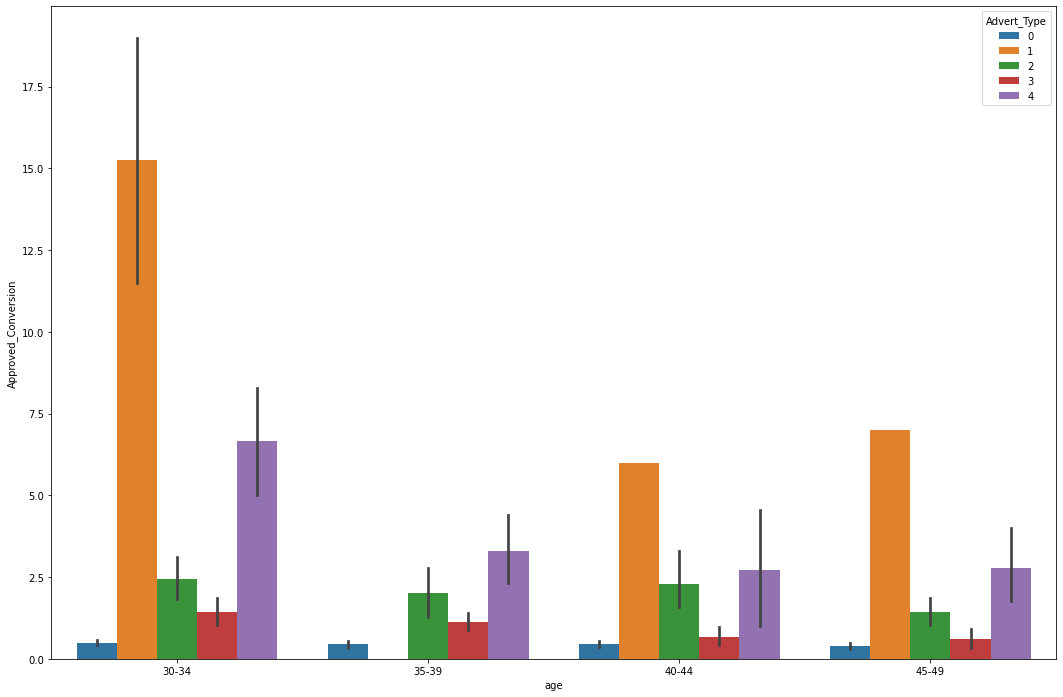

In [17]:
plt.gcf().set_size_inches(18, 12, forward=True)
sns.barplot(x = 'age', y = 'Approved_Conversion', data = df, hue = 'Advert_Type')

Advert (1) lead to the highest amount of sales although non consistent in regards to age.  Advert (4) lead although consistent among the age groups lead to a fair amount of sales.

<AxesSubplot:xlabel='gender', ylabel='Spent'>

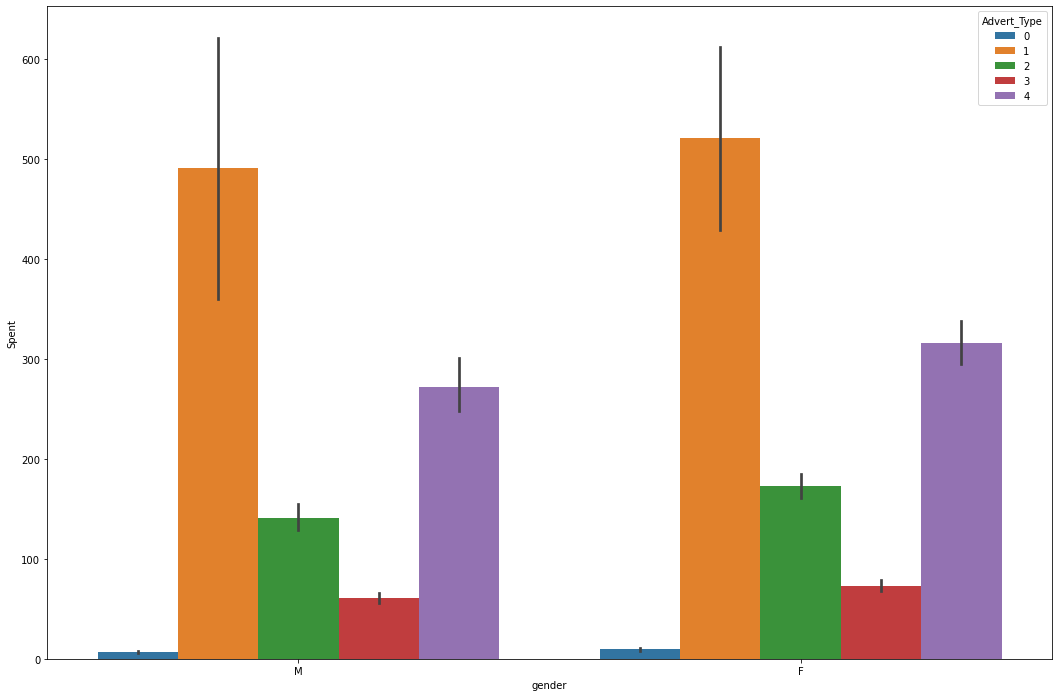

In [19]:
plt.gcf().set_size_inches(18, 12, forward=True)
sns.barplot(x = 'gender', y = 'Spent', data = df, hue = 'Advert_Type')

No gender bias present, thus gender neutral.

9. Perform the same analysis using hierarchical clustering and compare the results in terms of the number of useable clusters.

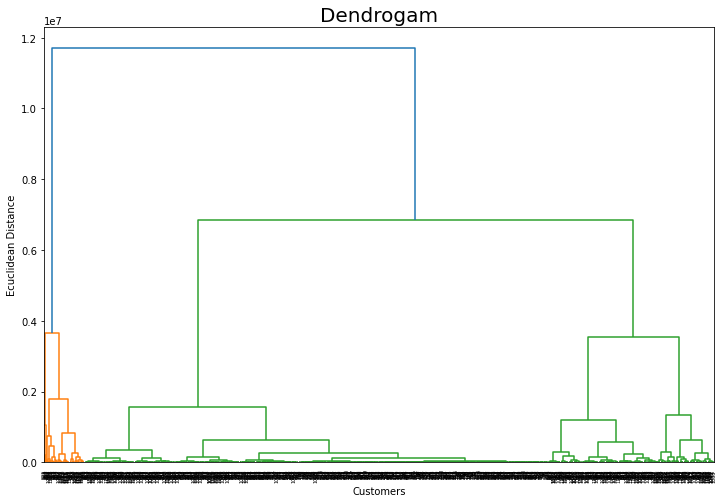

In [22]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (12, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), orientation = 'top')
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc 

array([2, 2, 2, ..., 2, 1, 1], dtype=int32)